**Univariate Linear Regression**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
"""Returns function f(x) = wx + b"""
def get_f(w, b):
    def f(x):
        return w*x + b
    return f

"""Squared Error Cost Function J."""
def cost(f, args, vals):
    n = len(vals)
    
    sum = 0
    for i in range(n):
        sum += (f(args[i]) - vals[i])**2
    return sum/(2*n)

In [3]:
"""returns gradient values"""
def gradient(f, args, vals):
    assert len(args) == len(vals) != 0
    
    n = len(args)
    dw, db = 0, 0
    for i in range(n):
        dw += (f(args[i]) - vals[i])*args[i]
        db += (f(args[i]) - vals[i])

    return dw/n, db/n


"""Gradient Descent Implementation"""
def gradient_descent(a, get_f, args, vals, reltol= 1e-5, maxiter=100000):
    assert len(args) == len(vals) != 0

    w, b = 0, 0
    n = len(args)
    for i in range(maxiter):
        f = get_f(w, b)
        dw, db = gradient(f, args, vals)

        w = w - a*dw
        b = b - a*db
        
    return w, b

In [4]:
dataset = pd.read_csv("./Datasets/salary_data.csv")

args, vals = dataset["YearsExperience"], dataset["Salary"]
x = gradient_descent(0.01, get_f, args, vals)
f = get_f(x[0], x[1])

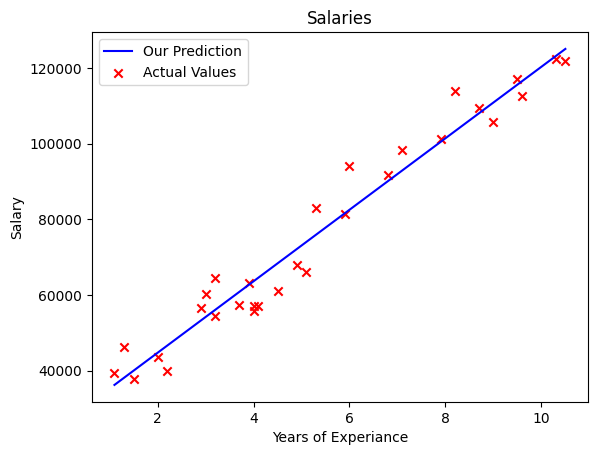

In [5]:
pred = [f(x) for x in args]
plt.plot(args, pred, c='b', label='Our Prediction')
plt.scatter(args, vals, marker='x', c='r', label='Actual Values')

plt.title("Salaries")
plt.ylabel('Salary')
plt.xlabel('Years of Experiance')
plt.legend()
plt.show()